In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, expon, multinomial
from sklearn.cluster import KMeans as km

In [2]:
def plot_nonhw_model(X, n, alpha, lambda_):
    ax = plt.subplots(figsize = (6,6))[1]
    plt.hist(X, alpha = 0.20, bins = max(X), color = 'grey', edgecolor = 'white', linewidth = 3) # plot histogram of input data set

    curve1 = np.linspace(1, 10 * lambda_, 1000)
    plt.plot(curve1, n * expon.pdf(curve1, loc = 1, scale = lambda_) * (1-alpha), linewidth = 3, color = 'red')
    plt.scatter(0, n * alpha, color = 'red')

    ax.set_yscale("log") 
    ax.set_ylim(bottom=1)
    ax.set_xlim(left=0)
    plt.xlabel('Evidence Depth')
    plt.ylabel('Number of Samples')
    plt.show()

In [3]:
def nonhw_model(X):

    n = np.shape(X)[0] # length of data set
    r = np.zeros([3,n]) # responsibility matrix
    alpha = np.sum(X == 0) / n # probability of an observation belonging to zero component
    lambda_ = n / np.sum(X != 0) # expected value of the geometric distribution
    log_likelihoods = []
    iteration = 0
    distance = 1

    while distance > (1/(n*10)): # convergence criterion

        # expectation
        r[0][X==0] = alpha # responsibility of zero values to first mode
        r[0][X!=0] = (1-alpha) * geom.pmf(X[X!=0], 1/lambda_) # responsibility of nonzero values to first component
        r = r / np.sum(r, axis = 0) # normalization

        # maximization
        alpha = np.sum(r[0][X==0]) / np.sum(r[0]) # MLE for 
        lambda_ = np.dot(X[X != 0], r[0][X != 0]) / ((1-alpha)*np.sum(r[0])) # reciprocal of MLE for p in geometric distribution
        lambda_ = 6 if lambda_ > 6 else lambda_

        # score
        hurdle = np.where(X == 0, alpha, (1-alpha) * geom.pmf(X,1/lambda_)) #  likelihood of each observation in hurdle model
        log_likelihood = np.sum(np.log(hurdle)) # sum of log of likelihood of each observation
        log_likelihoods.append(log_likelihood) 

        iteration += 1
        if iteration > 1:
            distance = np.abs(log_likelihoods[-2]-log_likelihoods[-1]) # magnitude of difference between each 

    return alpha, lambda_,log_likelihoods[-1]

In [4]:
def psi_to_data(N, alpha, lambda_):

    draws = multinomial.rvs(n = N, p = [alpha, 1 - alpha])

    X = [0 for _ in range(draws[0])]
    X_l = geom.rvs(1/lambda_, size = draws[1])

    X = np.concatenate((X,X_l))
    X = np.round(X).astype(int)

    return X

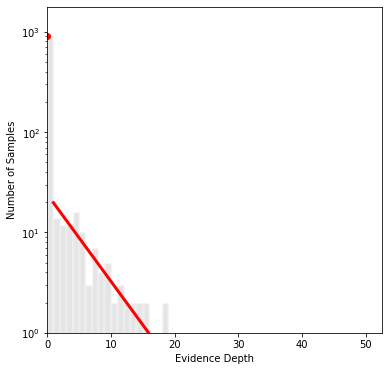

0.901 5


In [5]:
N = 1000
alpha = .9
lambda_ = 5

X = psi_to_data(N, alpha, lambda_)

alpha_hat, lambda_hat, log_likelihood = nonhw_model(X)
plot_nonhw_model(X, N, alpha_hat, lambda_hat)
print(alpha_hat, lambda_hat)